In [1]:
import os,sys
ruta_libs = os.path.abspath("libs")
if ruta_libs not in sys.path:
    sys.path.append(ruta_libs)
    
from helpLibs import *
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import numpy as np
# --- NÚMEROS CON TUS DATOS ---
D = 3.8
A = np.pi * (D/2)**2
m_full_water_kg = 95600
m_empty_kg = 26490
h_bed = 4.83  
void_fraction=0.4

Volume = (m_full_water_kg - m_empty_kg)/1000                  # 69.11 m3
h_all= Volume / A                                                 # 6.09
Vg=(h_all-h_bed)*A+h_bed*A*void_fraction 

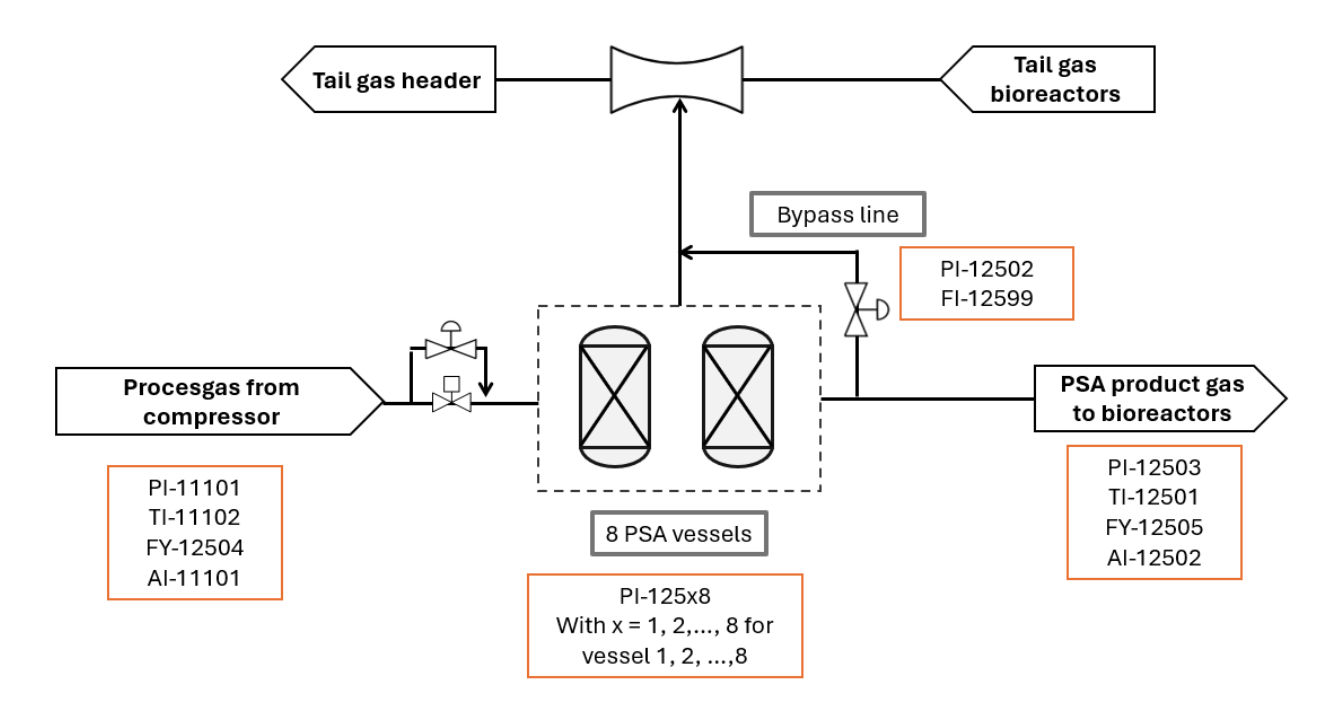

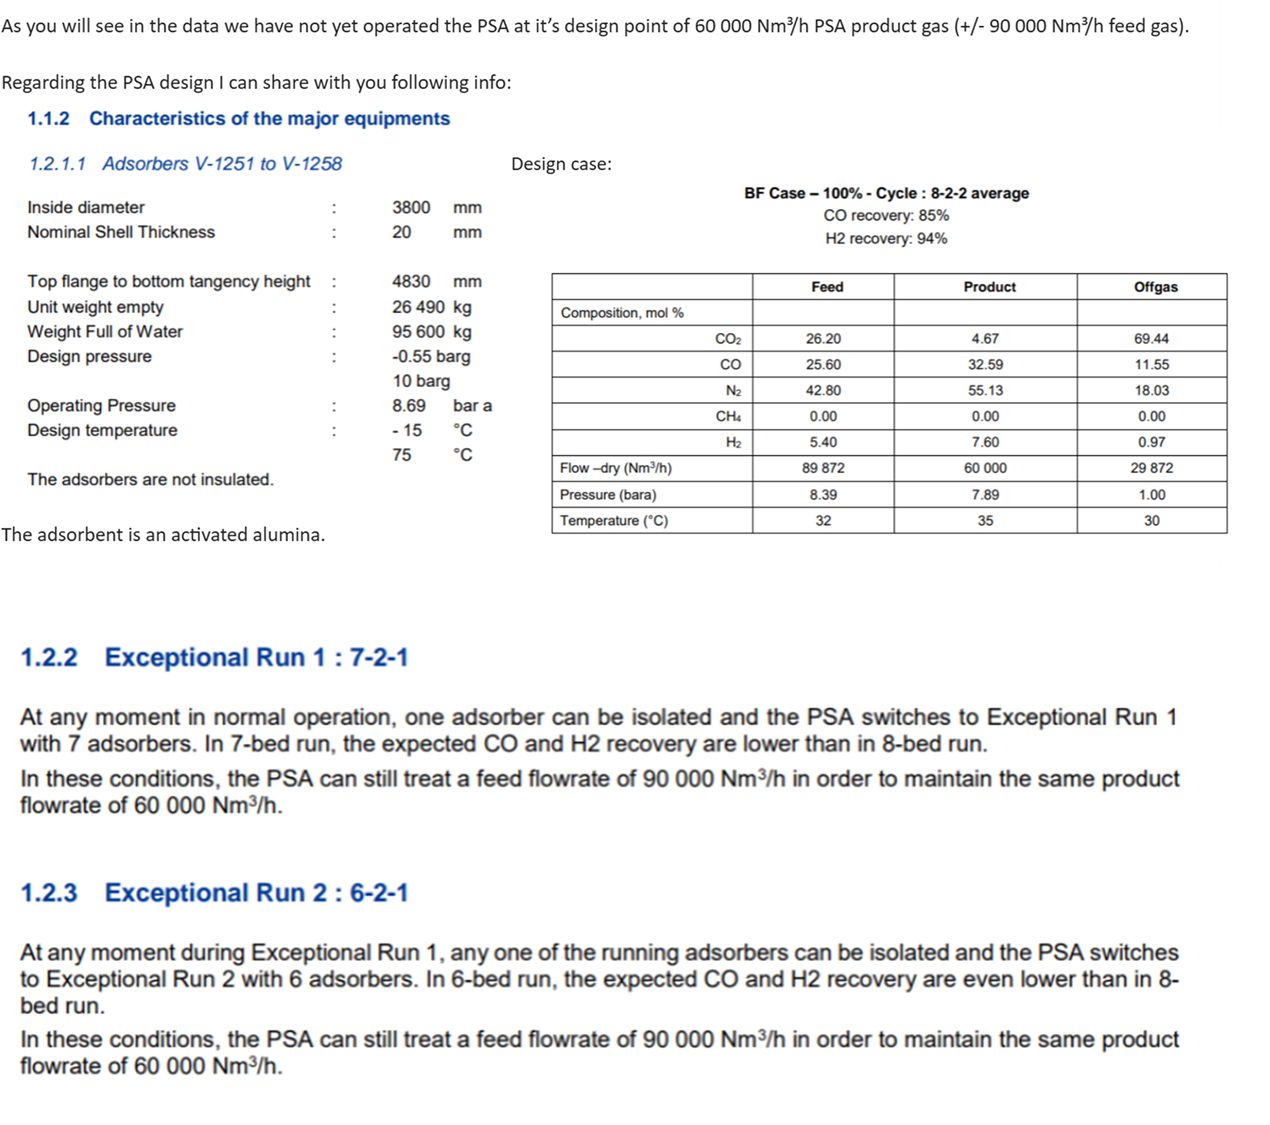

In [2]:
DATA_PATH = r"C:\Users\MiguelCamaraSanz\OneDrive - Fundacion CIRCE\Escritorio\github\ProSimNet\validacion\psa_data.csv" 
t0 = "2025-04-10 00:00:01"   
t1 = "2025-06-20 23:59:59" 
df, meta =getPSAdata(DATA_PATH,t0,t1)

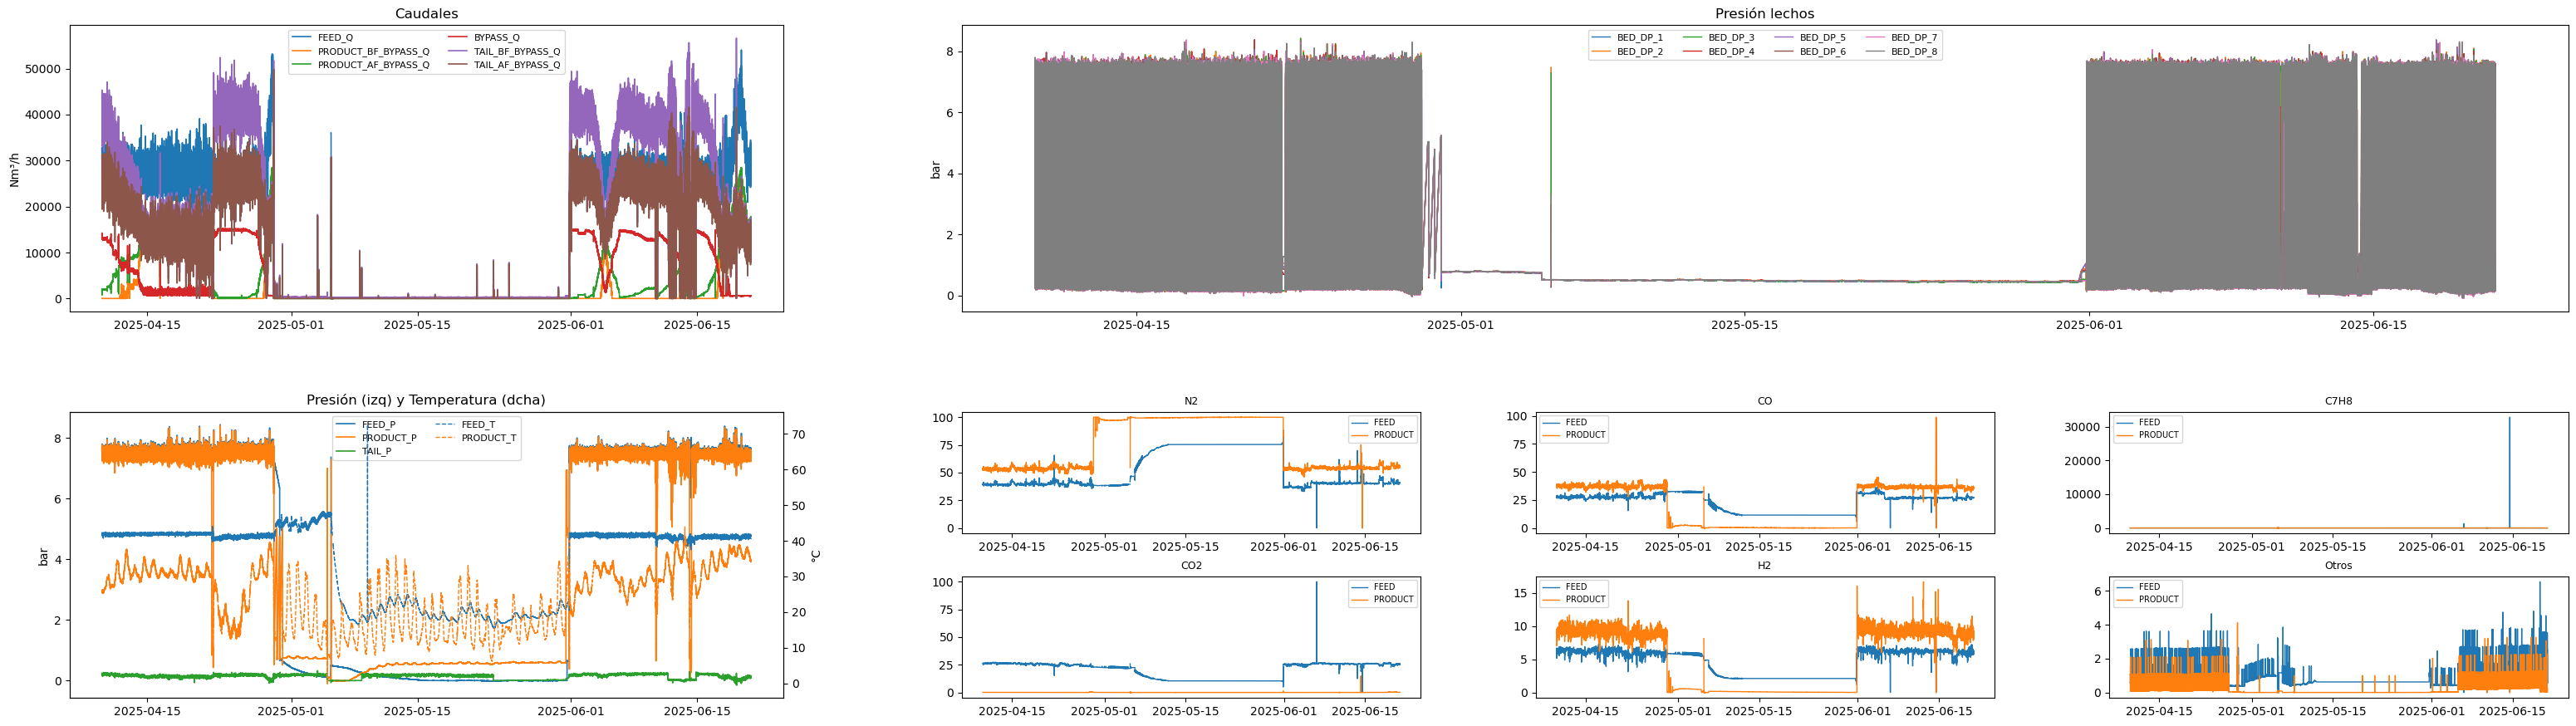

In [3]:
monitorData(df,t0,t1)

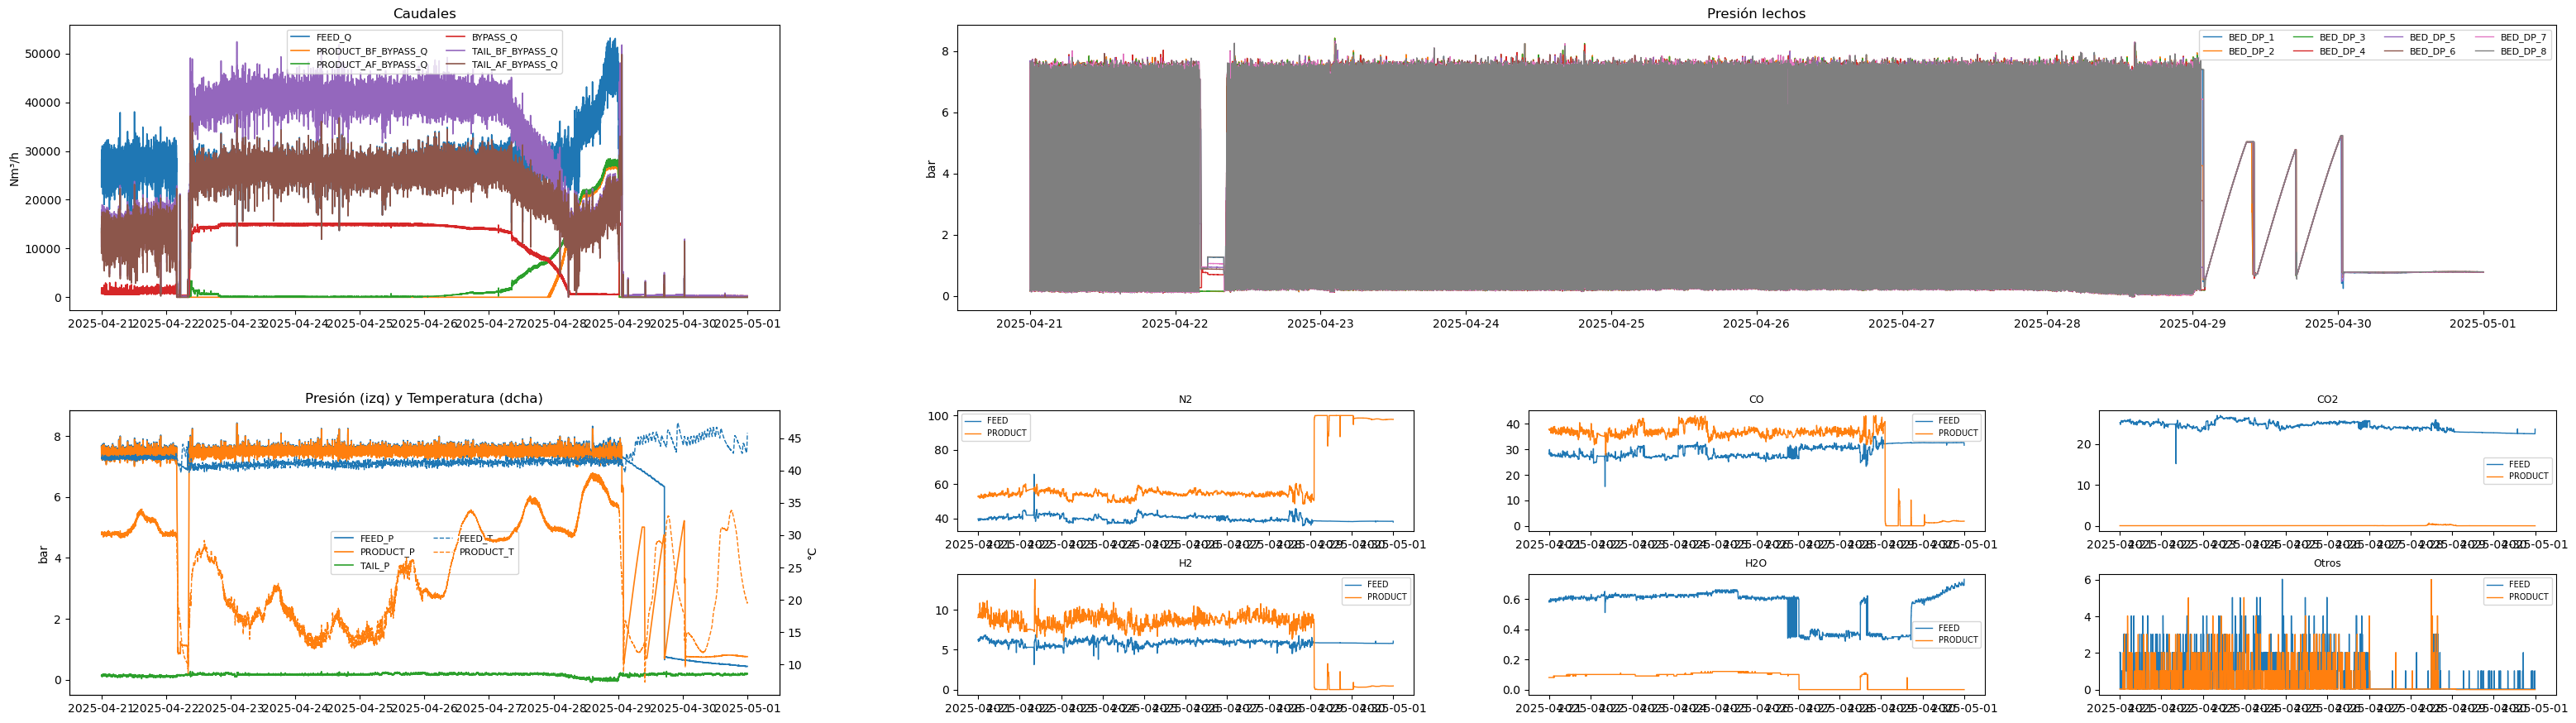

In [4]:
t0 = "2025-04-21 00:00:01"   
t1 = "2025-04-30 23:59:59"  
monitorData(df,t0,t1)

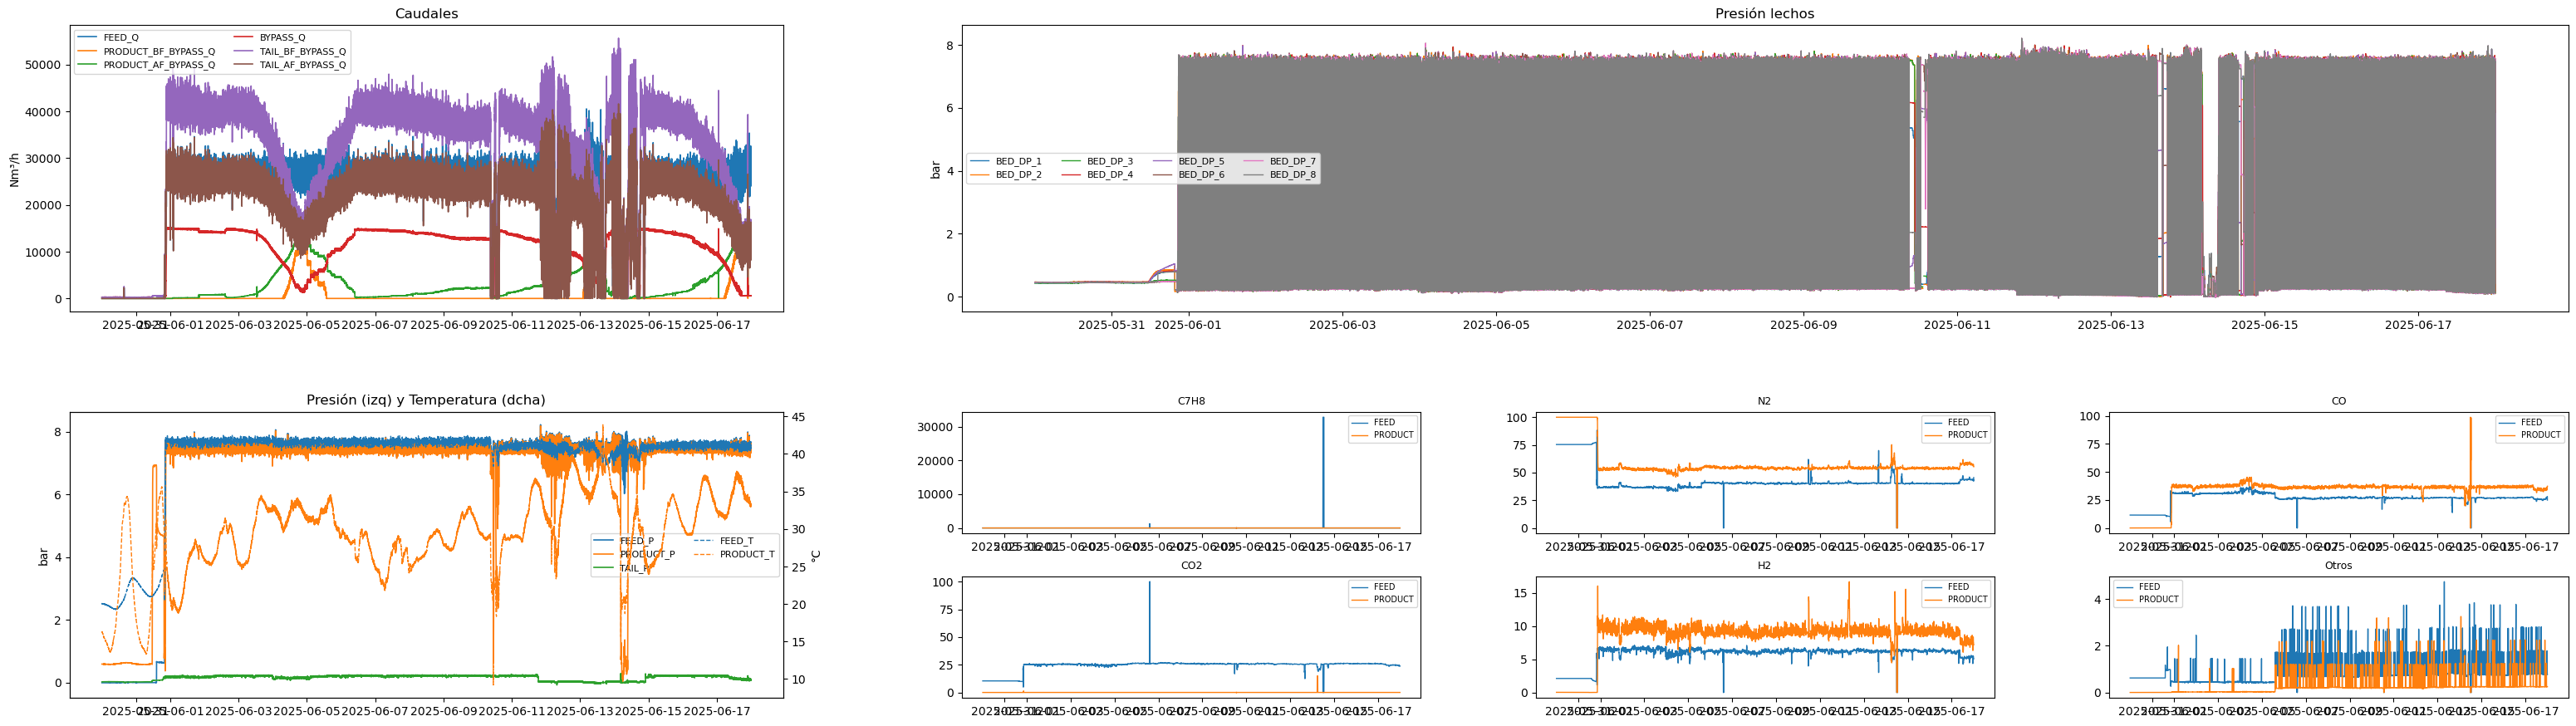

In [5]:
t0 = "2025-05-30 00:00:01"   
t1 = "2025-06-17 23:59:59"  
monitorData(df,t0,t1)

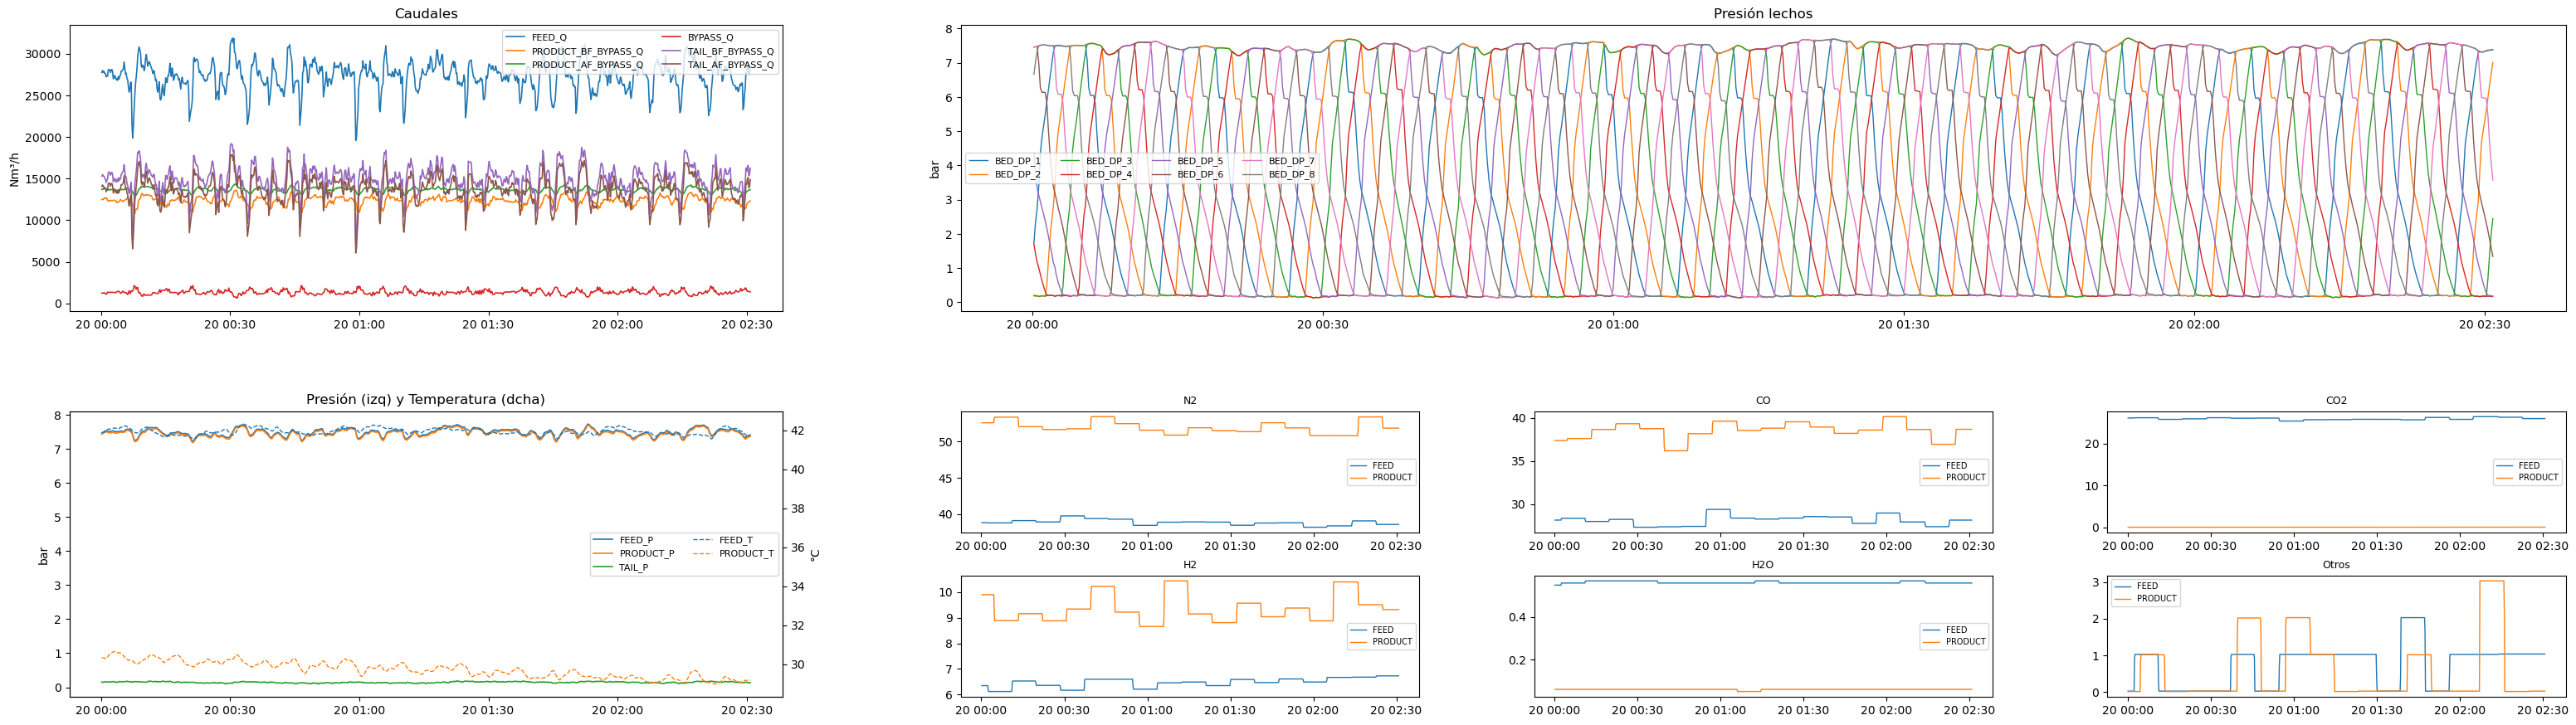

In [6]:
t0 = "2025-04-20 00:00:01"   
t1 = "2025-04-20 02:30:59"  
monitorData(df,t0,t1)

In [7]:
t0 = "2025-04-20 00:00:01"   
t1 = "2025-04-20 23:59:59"  
result = compute_cycle_times(df, start=t0, end=t1, anchor_bed="b1", decimals=2)
print("Ancla temporal:", result["anchor_time"])
result["summary_steps"]

Ancla temporal: 2025-04-20 00:13:10


bed  cycle_min  PRZ_min  FEED_min  BWD_min  PURGE_min  WAIT_min  cycle_count
0  b1      13.37     2.61      3.19     3.85       3.28      0.45          106
1  b2      13.25     2.60      3.15     3.82       3.24      0.44          107
2  b3      13.37     2.61      3.20     3.86       3.26      0.45          106
3  b4      13.37     2.61      3.20     3.85       3.28      0.43          106
4  b5      13.37     2.62      3.19     3.84       3.30      0.44          106
5  b6      13.37     2.61      3.19     3.84       3.30      0.43          106
6  b7      13.37     2.63      3.17     3.85       3.29      0.43          105
7  b8      13.37     2.60      3.20     3.91       3.24      0.43          105

In [8]:
result["summary_substeps"]

bed  PRZ_1_min  PRZ_2_min  PRZ_FEED_min  BWD_1_min  BWD_2_min  \
0  b1       0.78       0.51          1.31       0.45       1.19   
1  b2       0.77       0.49          1.33       0.44       1.24   
2  b3       0.77       0.48          1.34       0.44       1.21   
3  b4       0.78       0.47          1.35       0.45       1.18   
4  b5       0.73       0.54          1.34       0.44       1.23   
5  b6       0.73       0.53          1.34       0.44       1.24   
6  b7       0.76       0.53          1.33       0.44       1.21   
7  b8       0.78       0.47          1.34       0.45       1.18   

   BWD_PURGE_min  cycle_count  
0           2.22          106  
1           2.15          107  
2           2.21          106  
3           2.23          106  
4           2.18          106  
5           2.17          106  
6           2.21          105  
7           2.28          105

In [9]:
result["summary_inout"]

bed  INLET_min  OUT_min  cycle_count
0  b1       4.50     5.50          106
1  b2       4.48     5.38          107
2  b3       4.54     5.47          106
3  b4       4.56     5.51          106
4  b5       4.52     5.47          106
5  b6       4.53     5.47          106
6  b7       4.51     5.50          105
7  b8       4.54     5.53          105

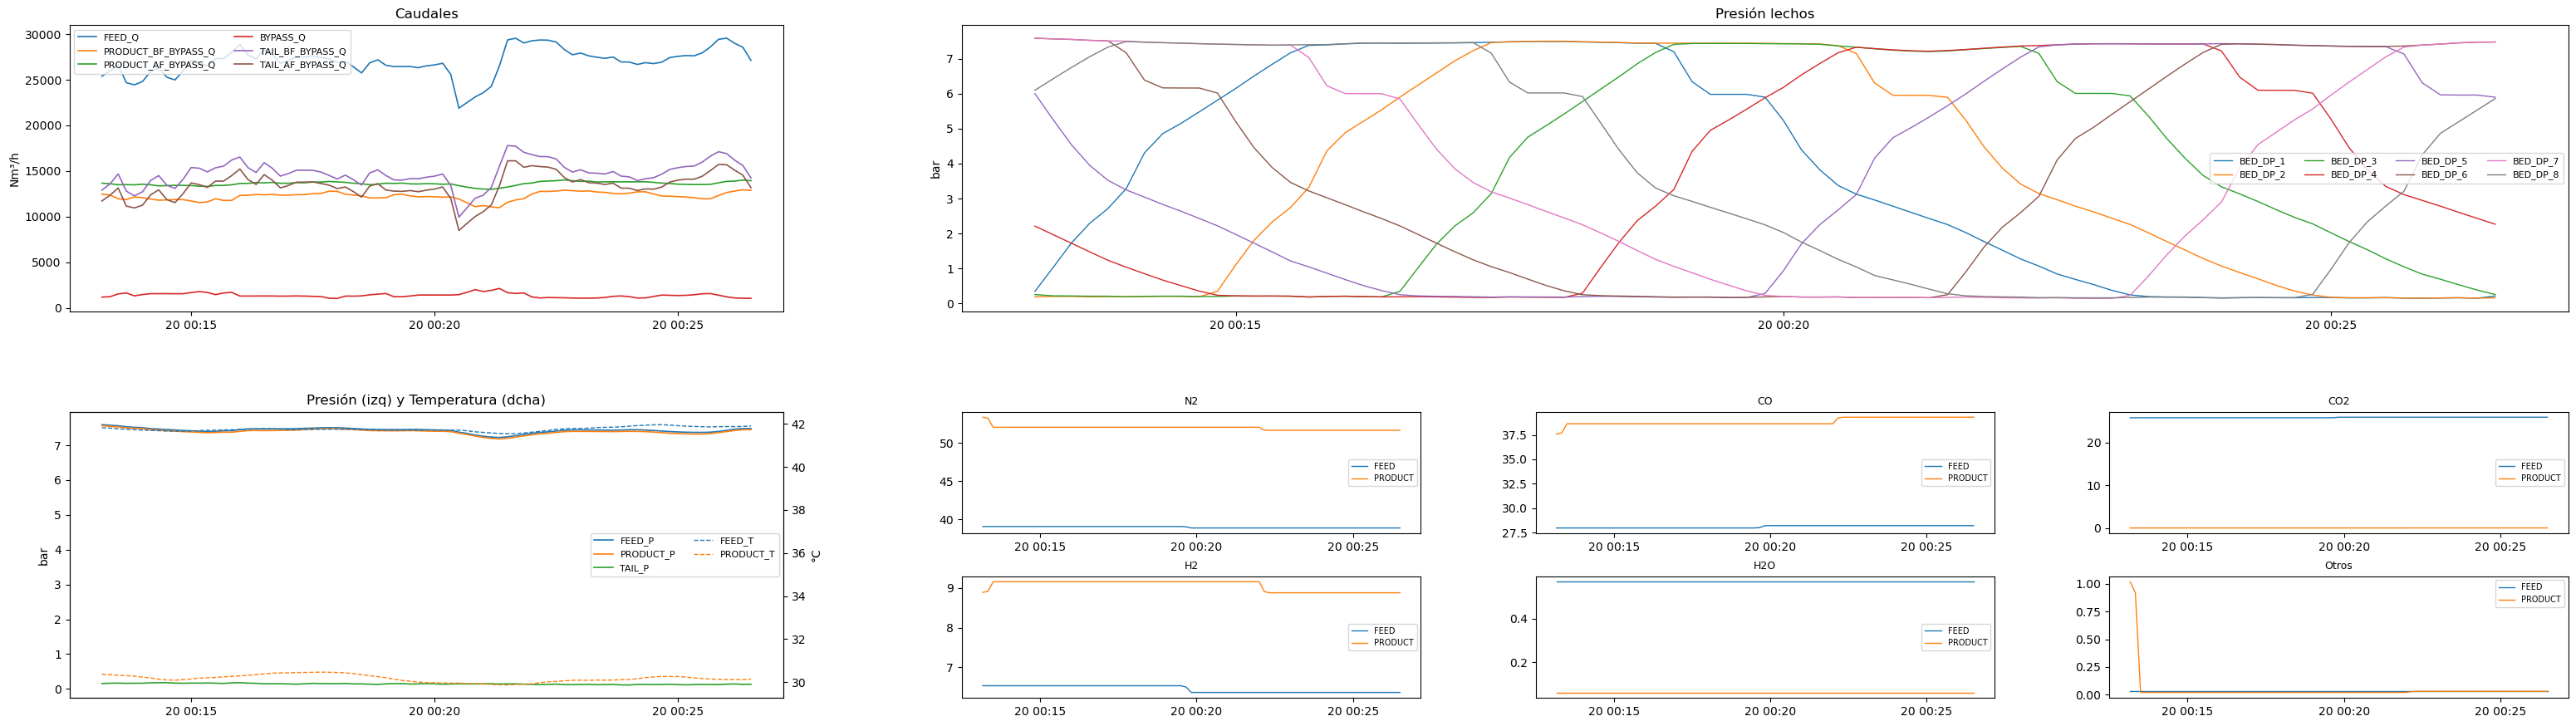

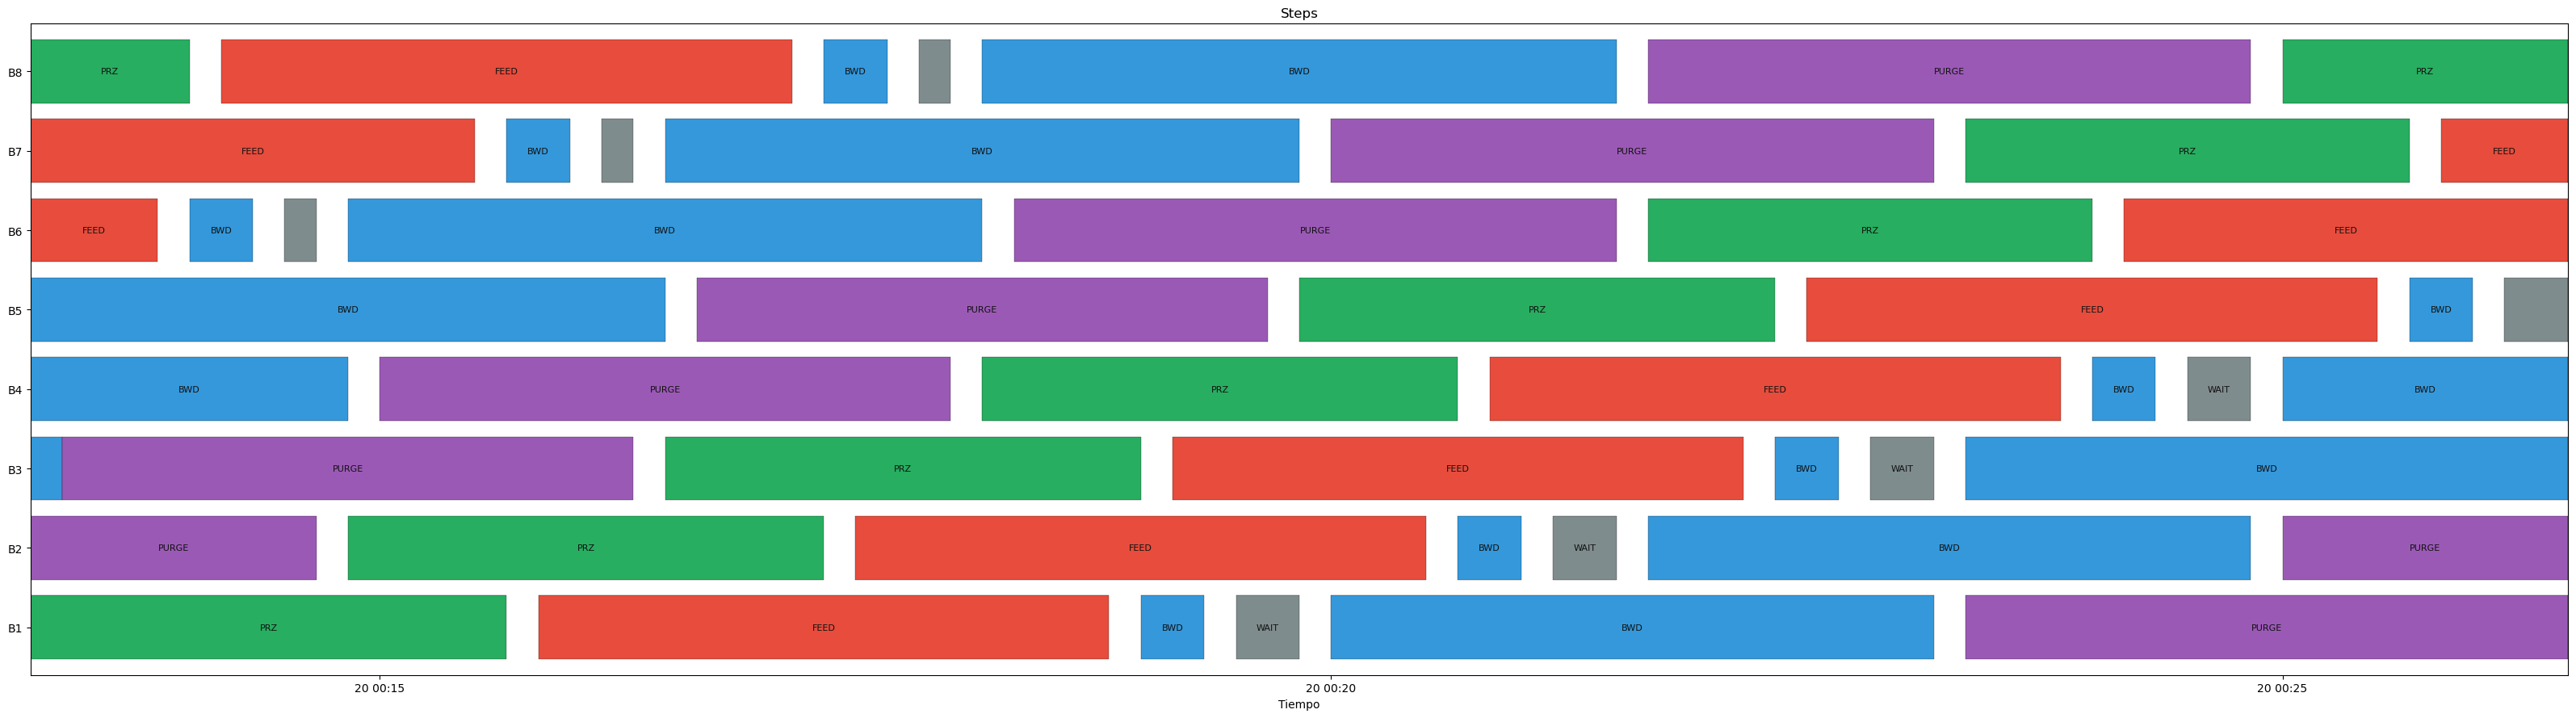

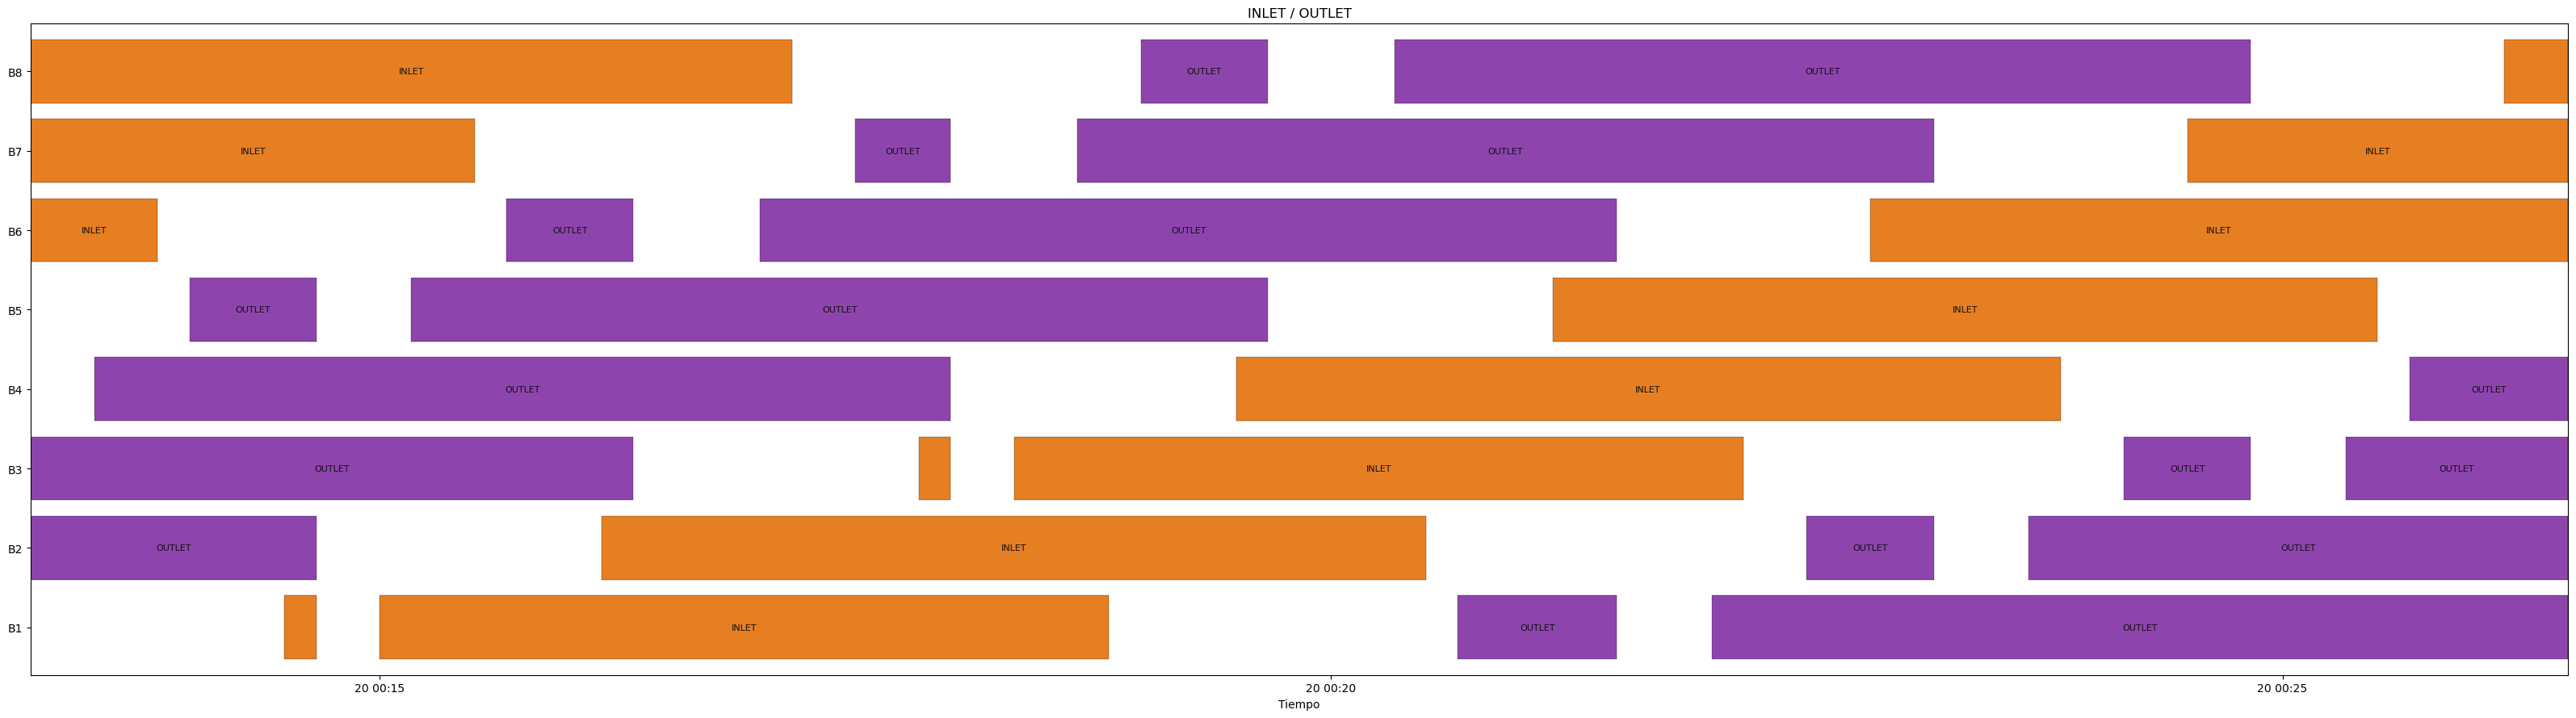

<Axes: title={'center': 'INLET / OUTLET'}, xlabel='Tiempo'>

In [10]:
t0 = "2025-04-20 00:13:03"   
t1 = "2025-04-20 00:26:39"  
monitorData(df,t0,t1)
plot_steps_gantt(df,t0,t1,mode='steps')
plot_steps_gantt(df,t0,t1,mode='inout')


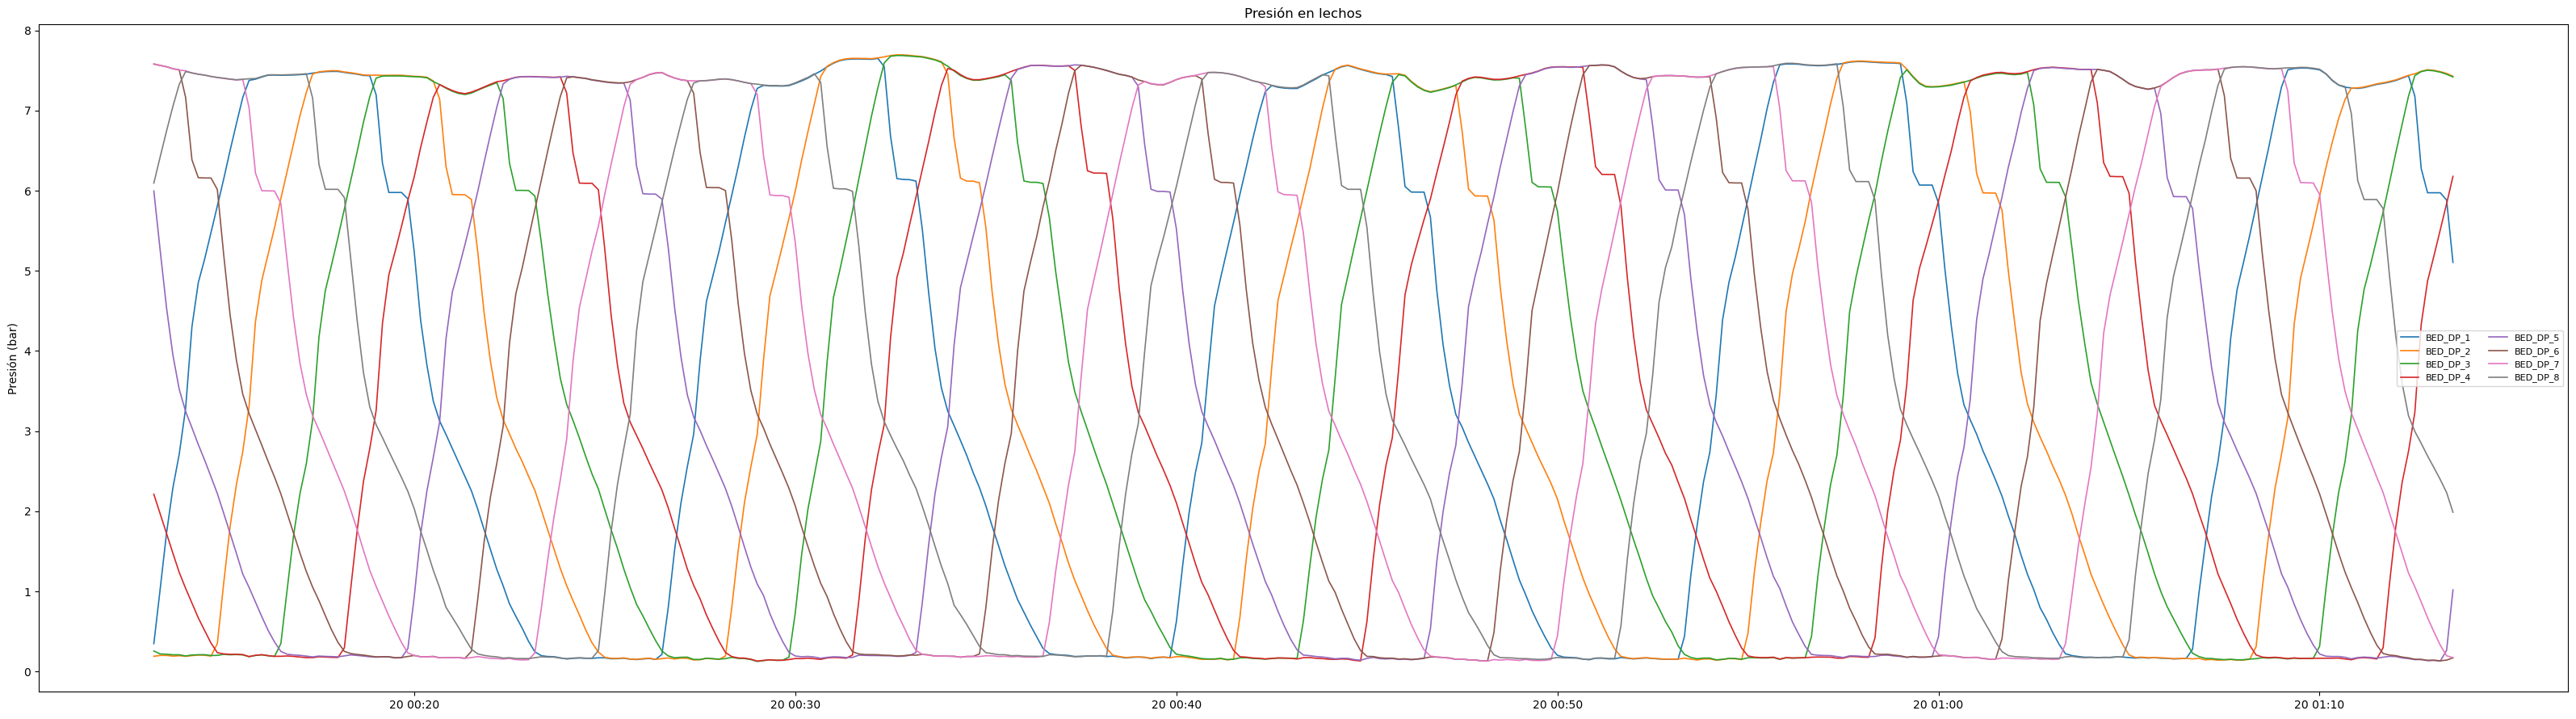

IndexError: index 363 is out of bounds for axis 0 with size 363

ValueError: Image size of 50091231x742 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 3200x900 with 1 Axes>

In [11]:
t0 = "2025-04-20 00:13:03"   
t1 = "2025-04-20 01:13:39"  
plot_raw_bed_pressure(df,t0,t1)
plot_steps_gantt(df,t0,t1,mode='steps')
plot_valves_grid(df,t0,t1)

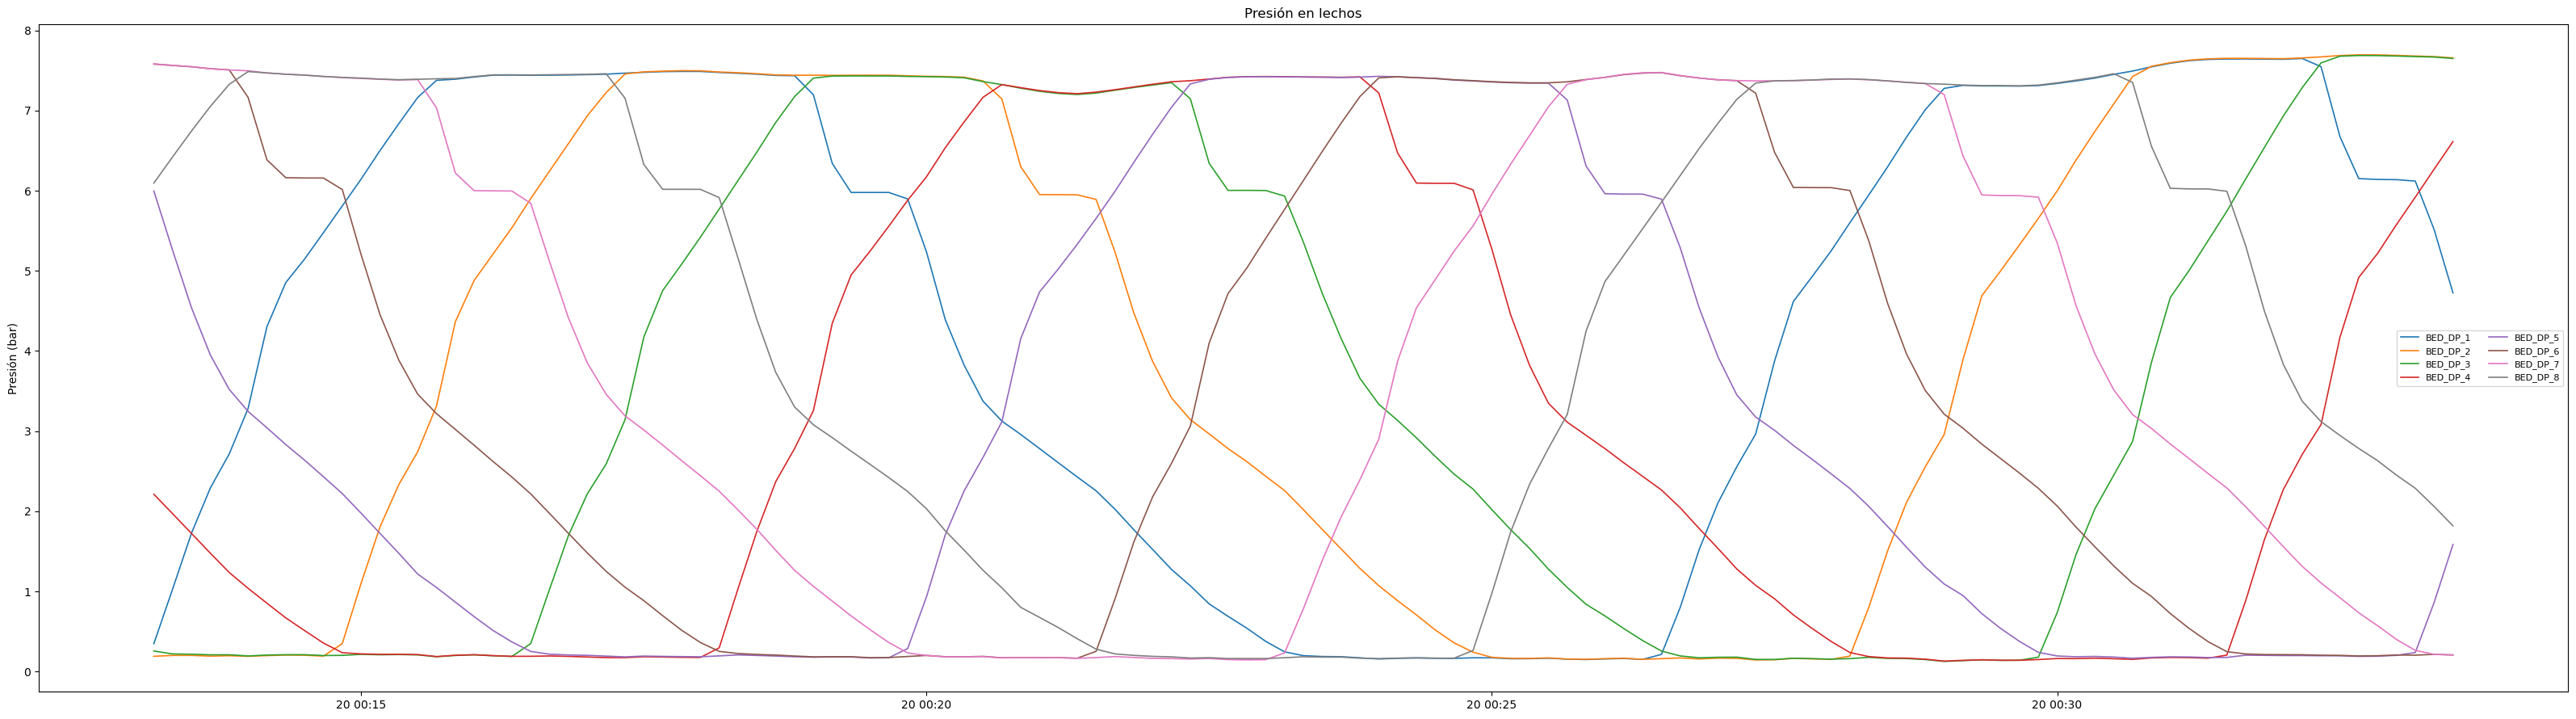

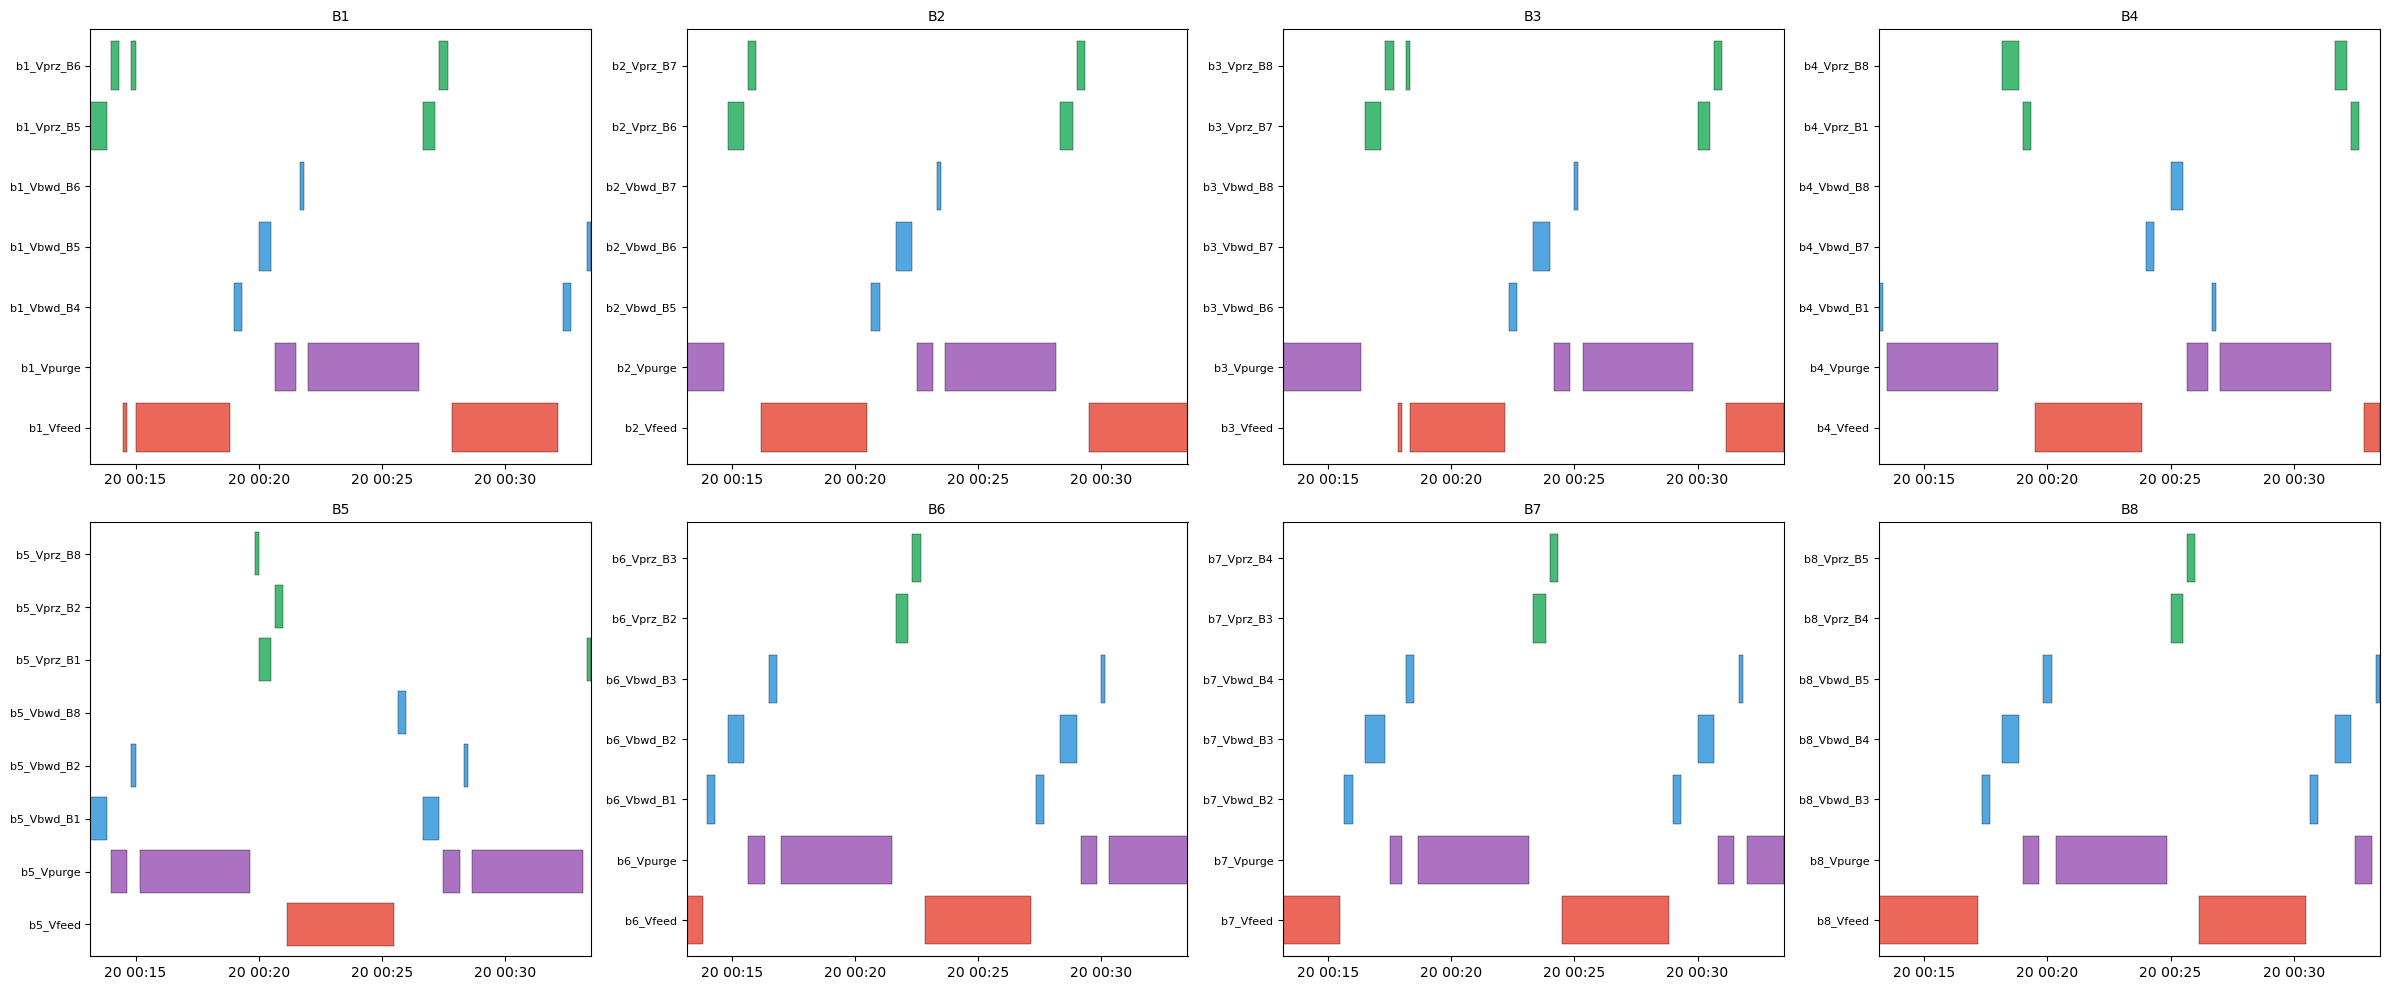

In [12]:
t0 = "2025-04-20 00:13:03"   
t1 = "2025-04-20 00:33:39"  
plot_raw_bed_pressure(df,t0,t1)
plot_valves_grid(df,t0,t1)

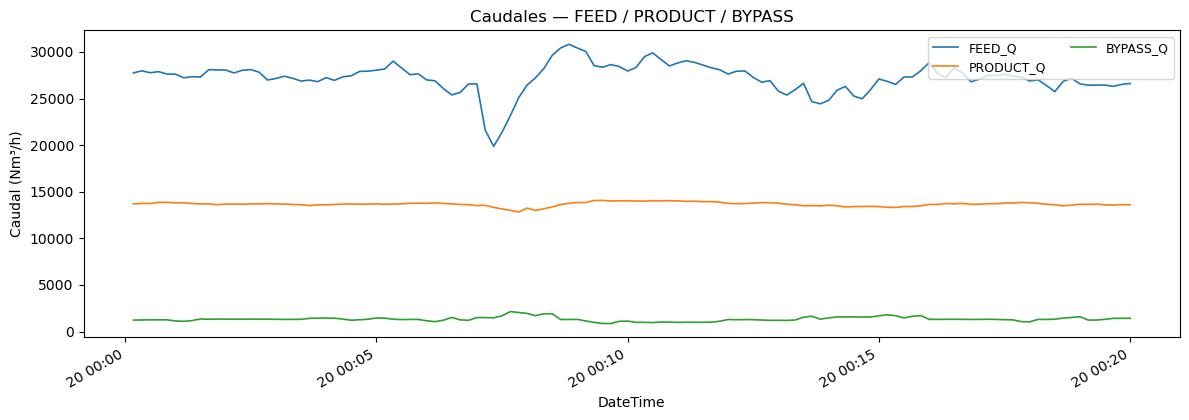

In [13]:
t0 = "2025-04-20 00:00:01"   
t1 = "2025-04-20 00:20:00"
flow=compute_flows(df,t0,t1,Vg)
plot_raw_header_flows(df,t0,t1)

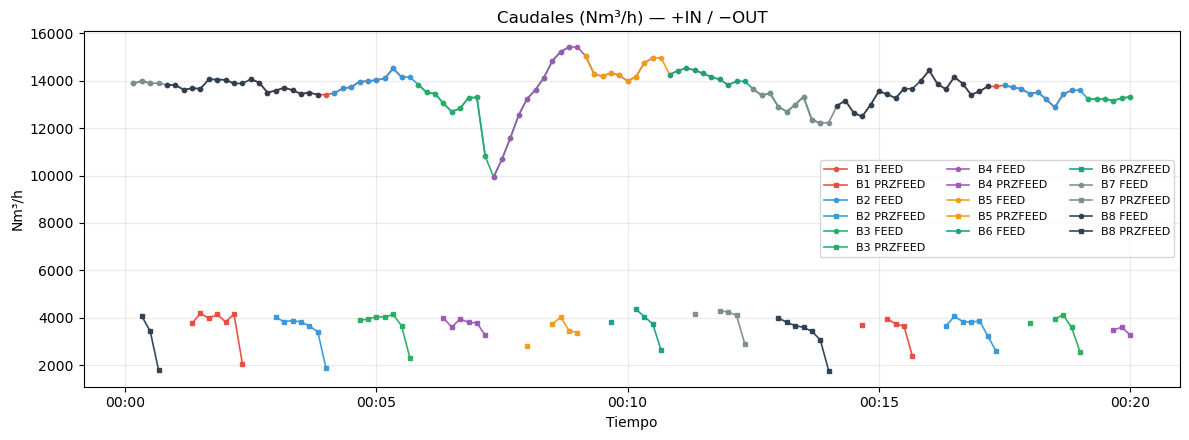

In [14]:
monitorFlows(flow,t0,t1,beds="all",substeps=["feed","przfeed"])

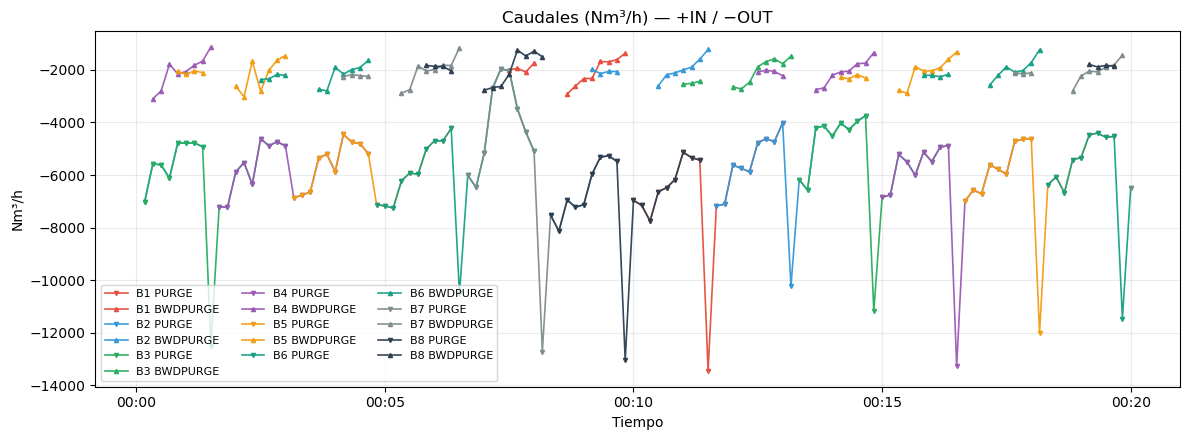

In [15]:
monitorFlows(flow,t0,t1,beds="all",substeps=["purge","bwdpurge"])

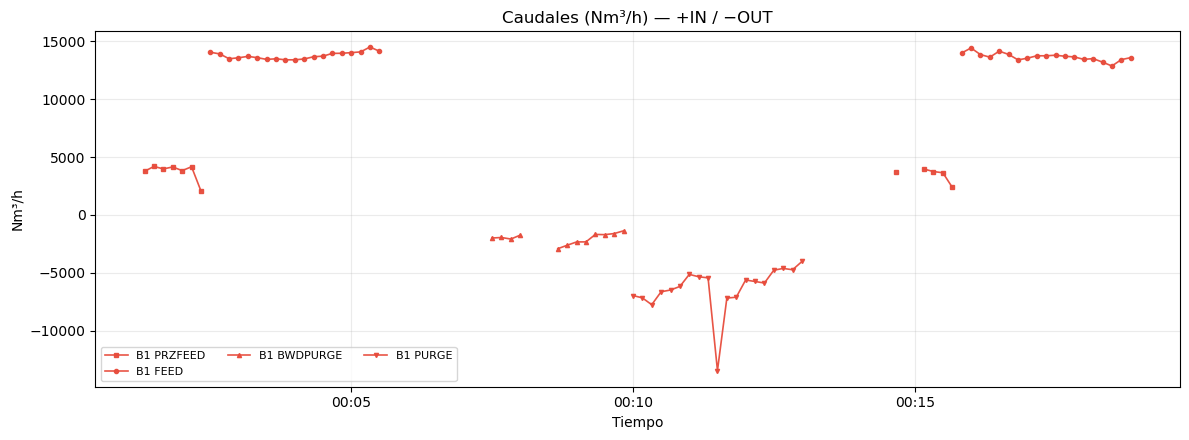

In [16]:
monitorFlows(flow,t0,t1,beds="b1")

In [17]:
flow.columns

Index(['DateTime', 'b1_PRZFEED_Nm3_h', 'b2_PRZFEED_Nm3_h', 'b3_PRZFEED_Nm3_h',
       'b4_PRZFEED_Nm3_h', 'b5_PRZFEED_Nm3_h', 'b6_PRZFEED_Nm3_h',
       'b7_PRZFEED_Nm3_h', 'b8_PRZFEED_Nm3_h', 'total_PRZFEED_Nm3_h',
       'feed_header_Nm3_h', 'product_header_Nm3_h', 'bypass_header_Nm3_h',
       'tail_header_Nm3_h', 'b1_FEED_Nm3_h', 'b2_FEED_Nm3_h', 'b3_FEED_Nm3_h',
       'b4_FEED_Nm3_h', 'b5_FEED_Nm3_h', 'b6_FEED_Nm3_h', 'b7_FEED_Nm3_h',
       'b8_FEED_Nm3_h', 'sum_beds_FEED_Nm3_h', 'b1_BWDPURGE_Nm3_h',
       'b2_BWDPURGE_Nm3_h', 'b3_BWDPURGE_Nm3_h', 'b4_BWDPURGE_Nm3_h',
       'b5_BWDPURGE_Nm3_h', 'b6_BWDPURGE_Nm3_h', 'b7_BWDPURGE_Nm3_h',
       'b8_BWDPURGE_Nm3_h', 'columns_from_headers_OUT_Nm3_h', 'b1_PURGE_Nm3_h',
       'b2_PURGE_Nm3_h', 'b3_PURGE_Nm3_h', 'b4_PURGE_Nm3_h', 'b5_PURGE_Nm3_h',
       'b6_PURGE_Nm3_h', 'b7_PURGE_Nm3_h', 'b8_PURGE_Nm3_h', 'total_OUT_Nm3_h',
       'recon_error_OUT_Nm3_h'],
      dtype='object')

In [18]:
flow['recon_error_OUT_Nm3_h']

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
115    0.0
116    0.0
117    0.0
118    0.0
119    0.0
Name: recon_error_OUT_Nm3_h, Length: 120, dtype: float64

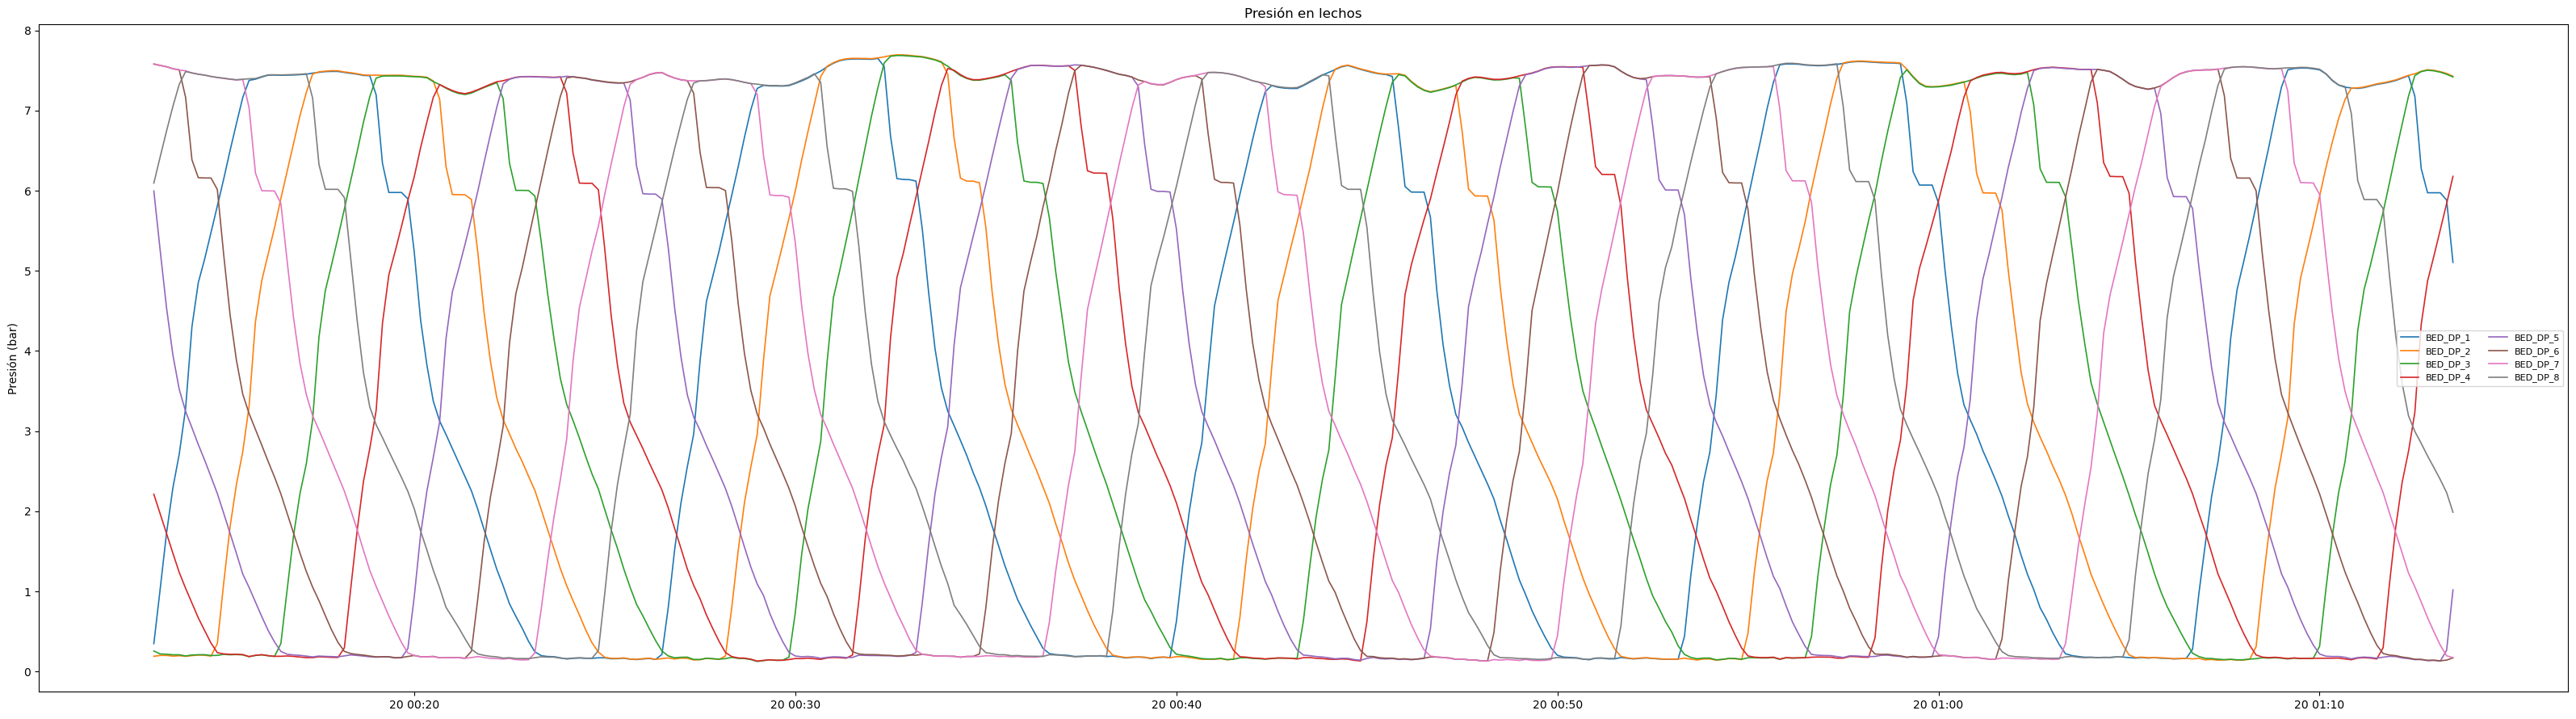

IndexError: index 363 is out of bounds for axis 0 with size 363

ValueError: Image size of 50091231x742 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 3200x900 with 1 Axes>

In [19]:
t0 = "2025-04-20 00:13:03"   
t1 = "2025-04-20 01:13:39"  
plot_raw_bed_pressure(df,t0,t1)
plot_steps_gantt(df,t0,t1,mode='steps')
plot_valves_grid(df,t0,t1)